<a href="https://colab.research.google.com/github/rodrigorissettoterra/Analise-de-series-temporais/blob/main/An%C3%A1lise_de_vendas_da_cafeteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as vendas de uma cafeteria

##Preparando o ambiente

###Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

###Importando a base de dados

In [ ]:
cafe = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/cafelura.csv')
cafe

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


###Modificações

Tipos de dados presentes na base de dados

In [ ]:
cafe.dtypes

mes       object
vendas     int64
dtype: object

Convertendo a data

In [ ]:
cafe['mes'] = pd.to_datetime(cafe['mes'])
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

###Informações sobre a base de dados utilizada

In [ ]:
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',cafe.shape[0])
print('O número de colunas é:',cafe.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',cafe.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 24
O número de colunas é: 2

A quantidade de dados nulos na base de dados é de: 0


###Criando uma função para configurar os gráficos automaticamente

In [ ]:
def plotar_grafico_configurado(nome_do_grafico, titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  nome_do_grafico = sns.lineplot(x=x, y=y, data=dataset)
  nome_do_grafico.figure.set_size_inches(12,6)
  nome_do_grafico.set_title(titulo, loc='left', fontsize = 18)
  nome_do_grafico.set_xlabel(labelx, fontsize = 14)
  nome_do_grafico.set_ylabel(labely, fontsize = 14)
  nome_do_grafico = nome_do_grafico

Criando um gráfico

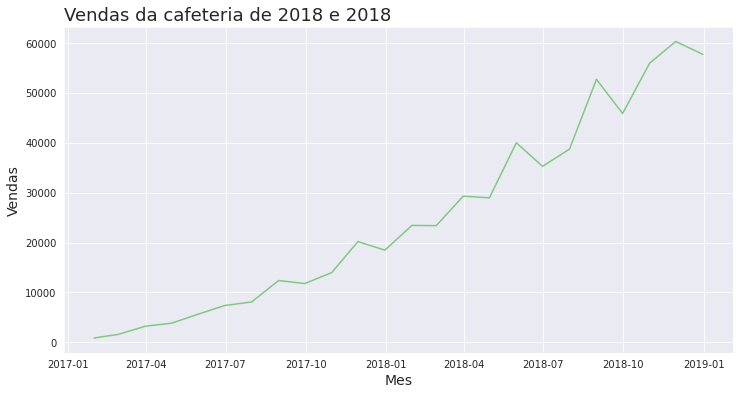

In [ ]:
plotar_grafico_configurado(
    'Vendas da cafeteria de 2018 e 2018',
    'Vendas da cafeteria de 2018 e 2018',
    'Mes',
    'Vendas',
    'mes',
    'vendas',
    cafe
)

##Normalizando a base de dados

Carregando uma nova base de dados, que contém o número de dias de final de semana de 2017 e 2018



In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/dias_final_de_semana.csv')
quantidade_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


Dividindo a quantidade de vendas por dias e guardando o resultado em uma nova coluna

In [ ]:
cafe['vendas_normalizadas'] = cafe['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias']
cafe

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


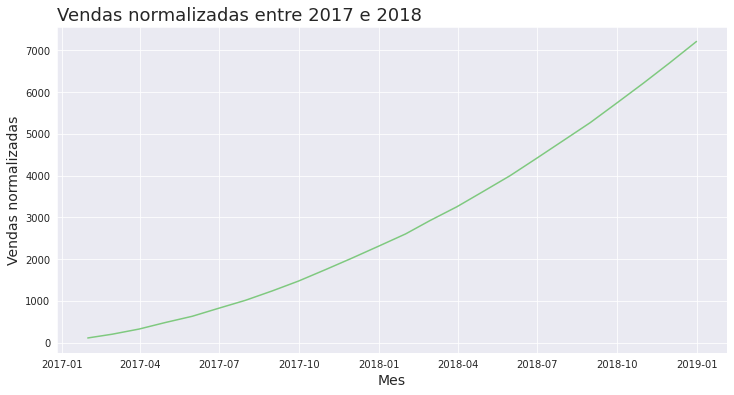

In [ ]:
plotar_grafico_configurado(
    'Vendas normalizadas entre 2017 e 2018',
    'Vendas normalizadas entre 2017 e 2018',
    'Mes',
    'Vendas normalizadas',
    'mes',
    'vendas_normalizadas',
    cafe
)

Comparativo: Antes e após a normalização

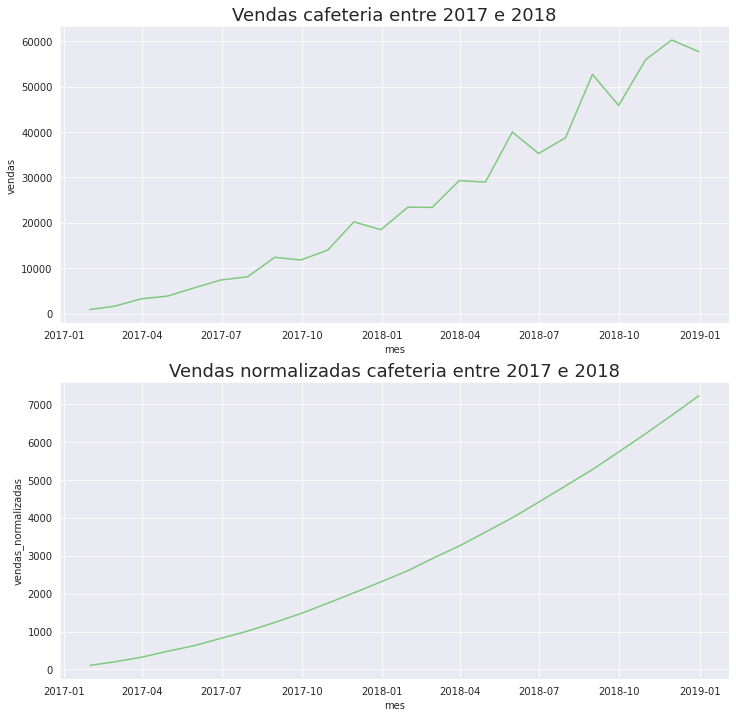

In [ ]:
plt.figure(figsize=(12,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafeteria entre 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data=cafe)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas cafeteria entre 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafe)
ax=ax

##Statsmodels

In [ ]:
#Importando a bilbioteca que irá auxiliar na análise de sazonalidade e ruído da série
from statsmodels.tsa.seasonal import seasonal_decompose

###analisando a base de dados com Statsmodels

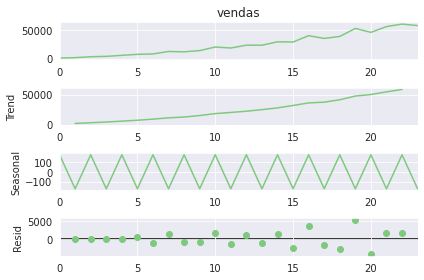

In [21]:
resultado = seasonal_decompose(cafe['vendas'], period=2)
ax = resultado.plot()

Separando os resultados apresentados e plotando de forma independente

In [22]:
#Criando as variáveis separadas
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

#Criando o DataFrame para armazenar os resultados
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido,
})

resultado = pd.DataFrame(data)

#Verificando o resultado
resultado

,observacao,tendencia,sazonalidade,ruido
0,880.0,NaN,171.590909,NaN
1,1600.0,1830.0,-171.590909,-58.409091
2,3240.0,2980.0,171.590909,88.409091
3,3840.0,4147.5,-171.590909,-135.909091
4,5670.0,5640.0,171.590909,-141.590909
5,7380.0,7131.5,-171.590909,420.090909
6,8096.0,8990.5,171.590909,-1066.090909
7,12390.0,11167.0,-171.590909,1394.590909
8,11792.0,12489.5,171.590909,-869.090909
9,13984.0,14990.0,-171.590909,-834.409091


###Criando uma função pra plotar gráficos

In [51]:
#Criando uma função para configurar e imprimir 4 gráficos comparativos

def plot_comparacao(x, y1, y2, y3, y4, dataset, titulo):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  plt.figure(figsize=(16,12))
  ax = plt.subplot(4,1,1)
  #ax.set_title(titulo,fontsize=18, loc='left')
  sns.lineplot(x = x, y = y1, data = dataset)
  ax.labelx = y1
  plt.subplot(4,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  ax.labelx = y2
  plt.subplot(4,1,3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax.labelx = y3
  ax = plt.subplot(4,1,4)
  sns.lineplot(x = x, y = y4, data = dataset)
  ax.labelx = y4
  ax = ax

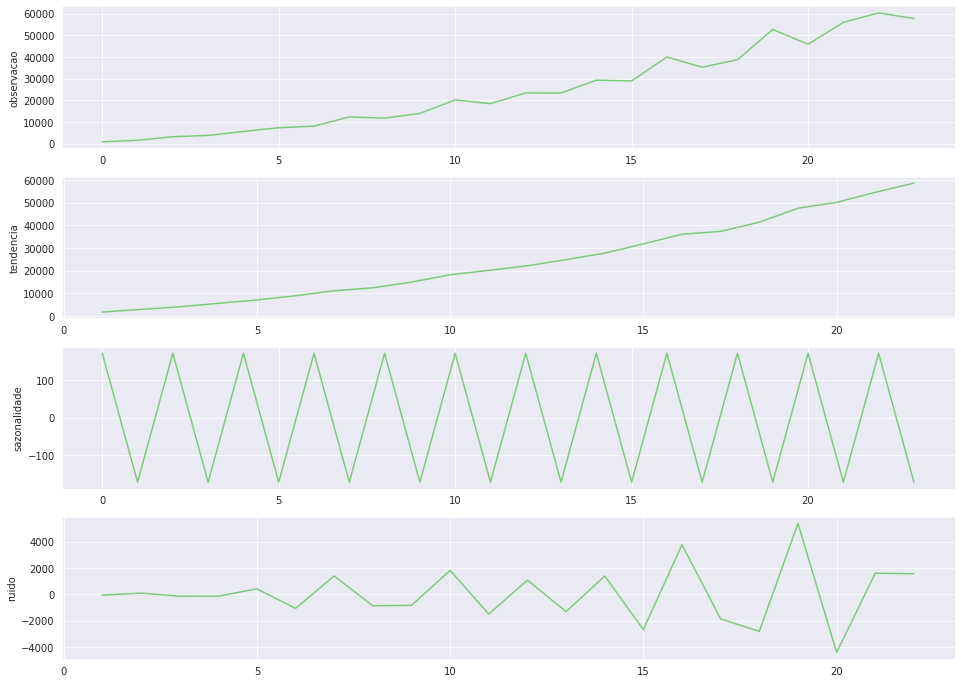

In [52]:
plot_comparacao(
    resultado.index,
    'observacao', 
    'tendencia',
    'sazonalidade', 
    'ruido', 
    resultado,
    'Exemplo de Statsmodels')